# Part 1: Data loading and Data analysis

####  Data is provided from: https://www.kaggle.com/datasets/jainaru/adult-income-census-dataset

In [42]:
#Import necessaries
from pandas import read_csv , DataFrame , concat , get_dummies 
from random import sample
from matplotlib.pyplot import pie , bar , hist , xlabel , ylabel , title , figure , show , legend ,xticks
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#Instancing from "StandardScaler" and "LabelEncoder" objects
scaler = StandardScaler()
encoder = LabelEncoder()

In [43]:
#Data loading
path = "adult.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24385,18,Private,265099,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
17953,24,Private,42401,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,47,United-States,<=50K
2987,65,Private,344152,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,5556,0,50,United-States,>50K
12467,37,Private,161111,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
27133,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
2098,49,Private,187370,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
31442,55,Self-emp-not-inc,41938,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,8,United-States,<=50K
13403,67,Local-gov,233681,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States,<=50K
2731,57,?,300104,5th-6th,3,Married-civ-spouse,?,Husband,White,Male,7298,0,84,United-States,>50K
28153,33,Private,179509,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [44]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
#Data numeric values information
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
#Getting names from columns with Object data type
for col in [Col for Col in df.columns if df[Col].dtype=='O']:
    print(col)
    print(df[col].unique())
    print('------------------------------------------')

workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
------------------------------------------
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
------------------------------------------
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
------------------------------------------
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
------------------------------------------
relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
------------------------------------------
rac

#### It sounds some columns contains "?"

In [47]:
for col in ['native.country','occupation','workclass']:
    percent = (df[col].to_list().count('?')*100)//len(df)
    print(f"{percent}% of column {col} is > ?")

1% of column native.country is > ?
5% of column occupation is > ?
5% of column workclass is > ?


#### Fixing this issue by impute them with 'most_frequent' strategy

In [48]:
#Instancing from 'SimpleImputer' with 'most_frequent' strategy
imputer = SimpleImputer(missing_values='?',strategy='most_frequent')

#Replacing value '?' with most frequnet value
native_country = DataFrame(imputer.fit_transform(df['native.country'].to_numpy().reshape(-1,1)),columns=['native_country'])
occupation = DataFrame(imputer.fit_transform(df.occupation.to_numpy().reshape(-1,1)),columns=['occupation'])
workclass =  DataFrame(imputer.fit_transform(df.workclass.to_numpy().reshape(-1,1)),columns=['workclass'])

In [49]:
#Removing columns that have '?' with fixed one's
df = df.drop(['native.country','occupation','workclass'],axis=1)
df = concat([df,native_country,occupation,workclass],axis=1)
df.sample(5)

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,native_country,occupation,workclass
7687,54,198186,HS-grad,9,Never-married,Not-in-family,Black,Female,0,0,38,<=50K,United-States,Other-service,State-gov
25475,24,183410,Some-college,10,Never-married,Own-child,White,Female,0,0,17,<=50K,United-States,Sales,Private
7063,31,446358,Doctorate,16,Never-married,Not-in-family,White,Male,0,0,50,>50K,Mexico,Prof-specialty,Local-gov
1460,39,115289,Some-college,10,Divorced,Own-child,White,Male,0,1380,70,<=50K,United-States,Sales,Private
13043,20,122649,HS-grad,9,Never-married,Not-in-family,White,Female,0,0,30,<=50K,United-States,Other-service,Private


#### Some visualization on data

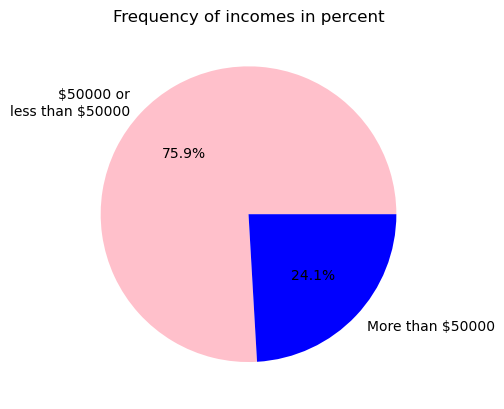

In [50]:
colors = ['blue','red','orange','green','pink','gray']
pie(df.income.value_counts().values,
    labels=['$50000 or\nless than $50000','More than $50000'],
    autopct='%1.1f%%',
    colors=sample(colors,2))
title('Frequency of incomes in percent')
show()

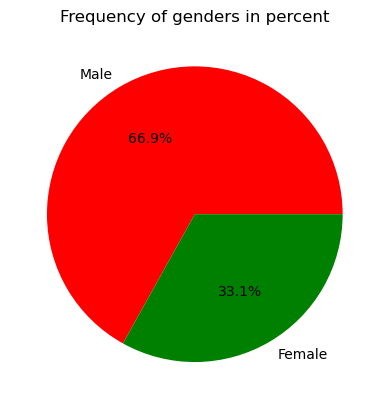

In [51]:
pie(df.sex.value_counts().values,
    labels=['Male','Female'],
    autopct='%1.1f%%',
    colors=sample(colors,2))
title('Frequency of genders in percent')
show()

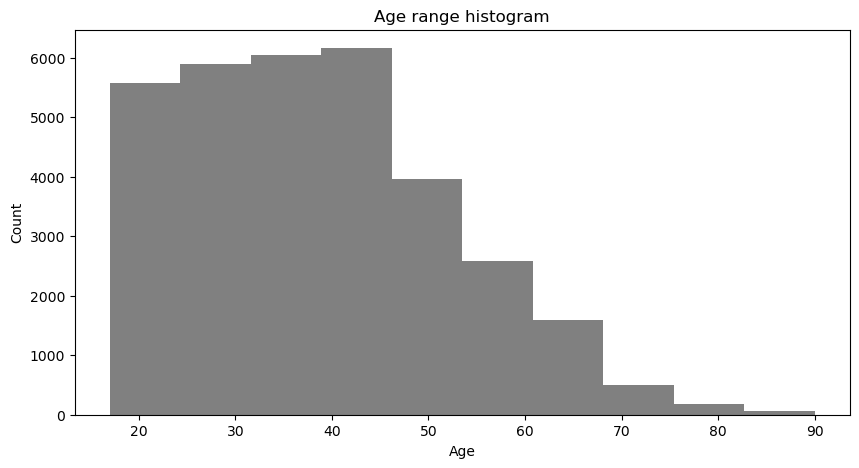

In [52]:
figure(figsize=(10,5))
hist(df.age,color=sample(colors,1))
xlabel('Age')
ylabel('Count')
title('Age range histogram')
show()

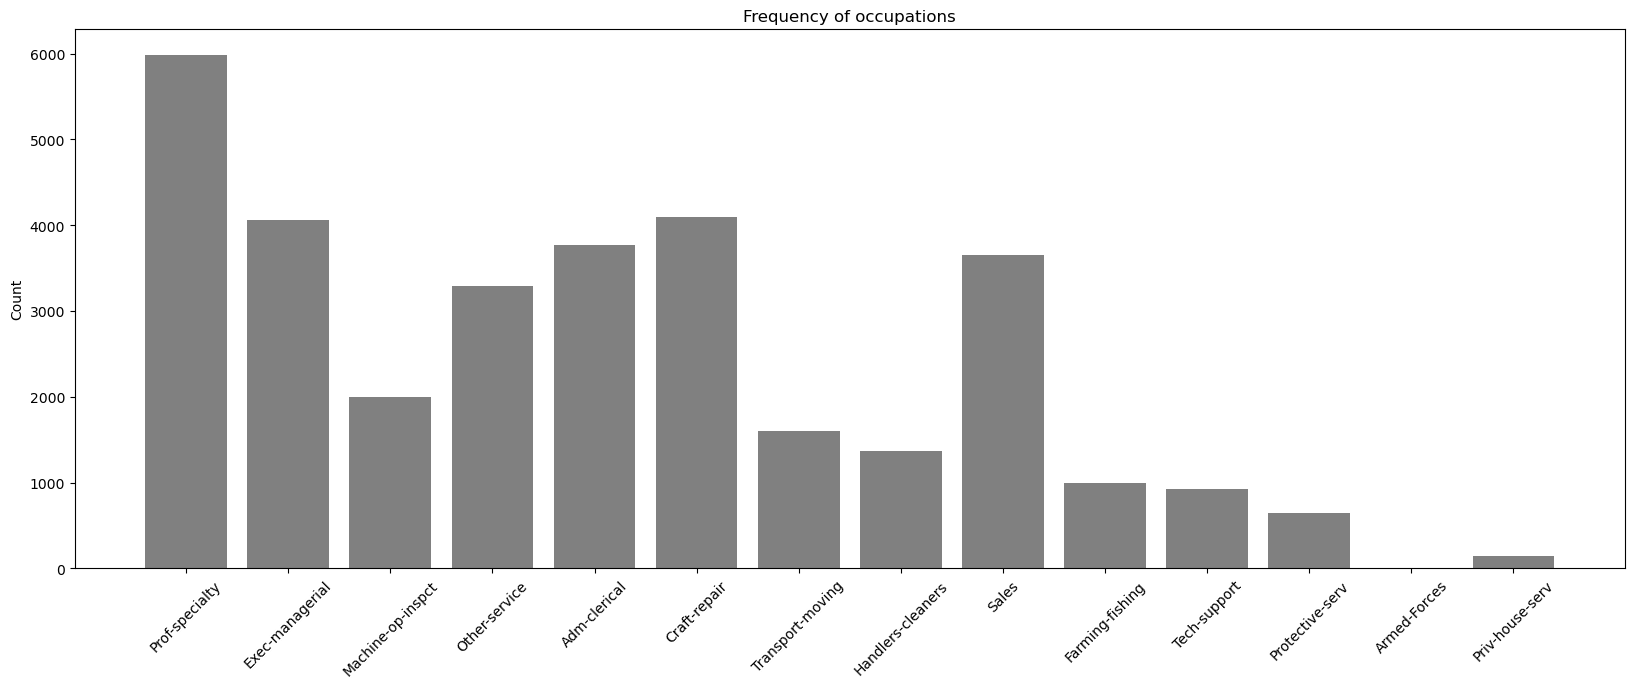

In [53]:
figure(figsize=(20,7))
bar(df.occupation.unique(),
    [df.occupation.to_list().count(i) for i in df.occupation.unique()],
    color=sample(colors,1))
ylabel('Count')
xticks(rotation=45)
title('Frequency of occupations')
show()

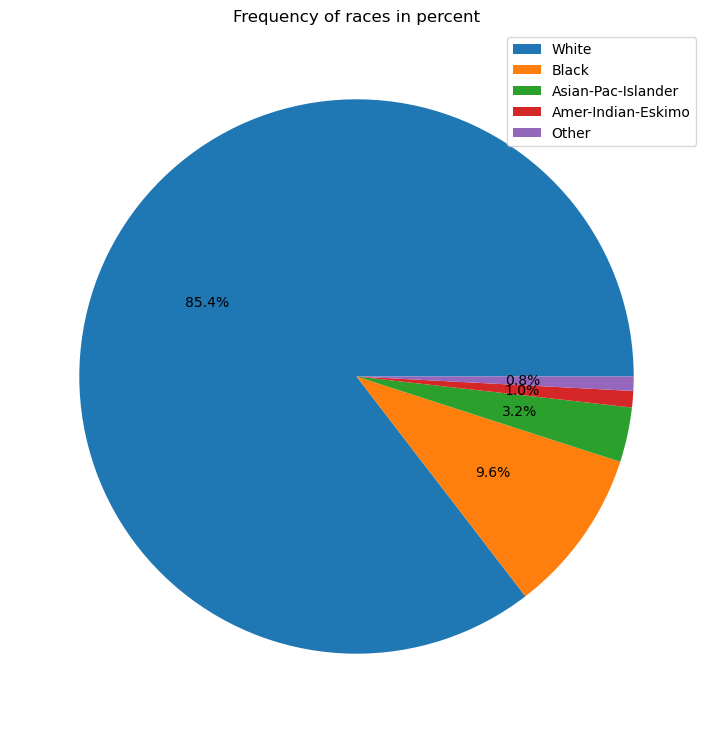

In [54]:
figure(figsize=(9,9))
pie(df.race.value_counts().values,
    autopct='%1.1f%%')
legend(['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])
title('Frequency of races in percent')
show()

In [55]:
#Countries count
df.native_country.value_counts()

native_country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

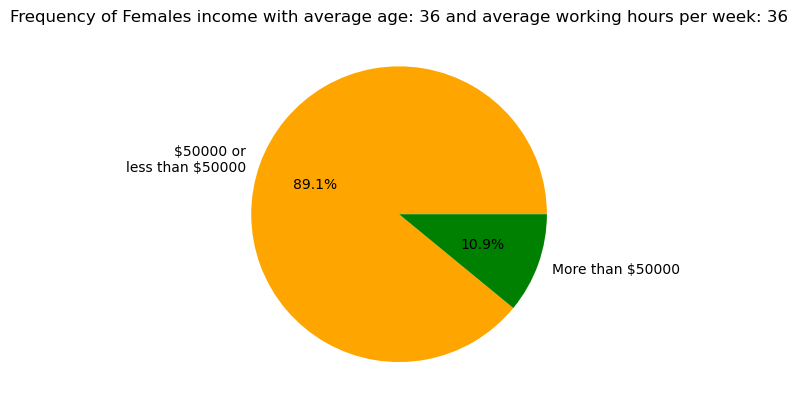

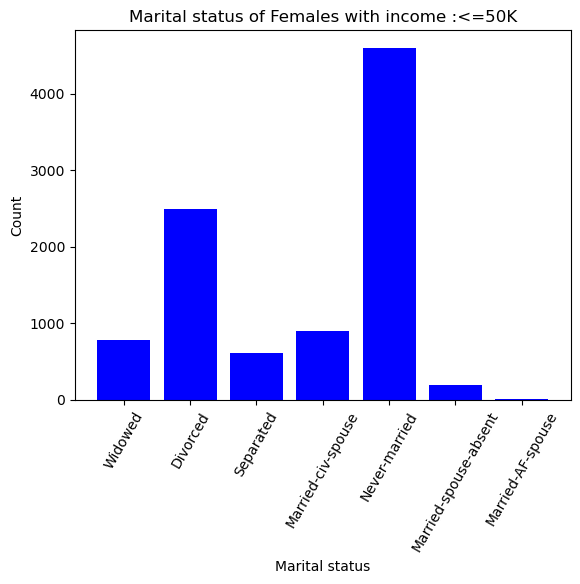

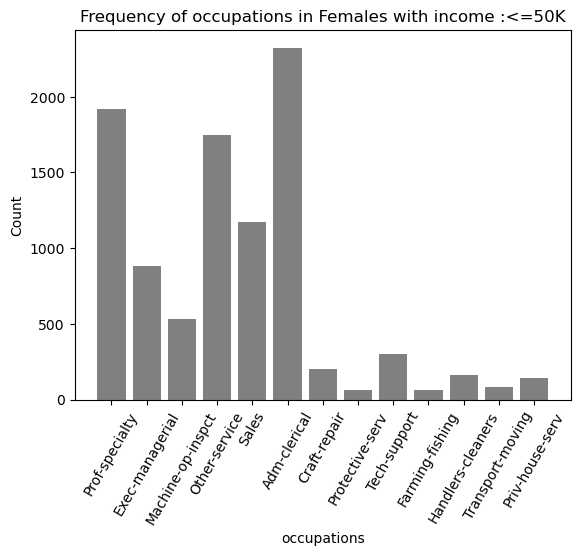

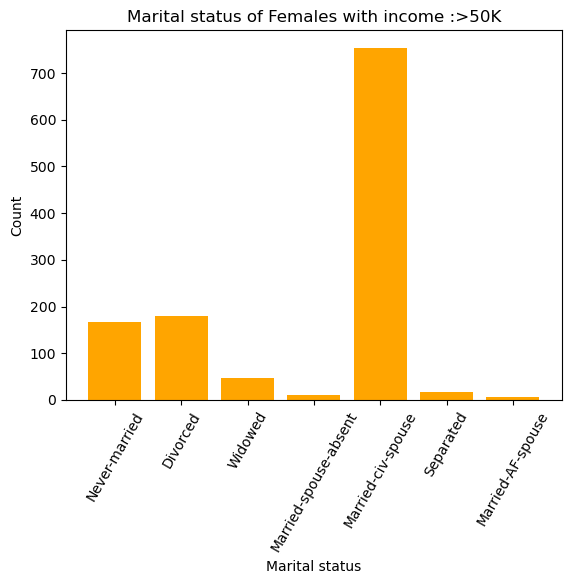

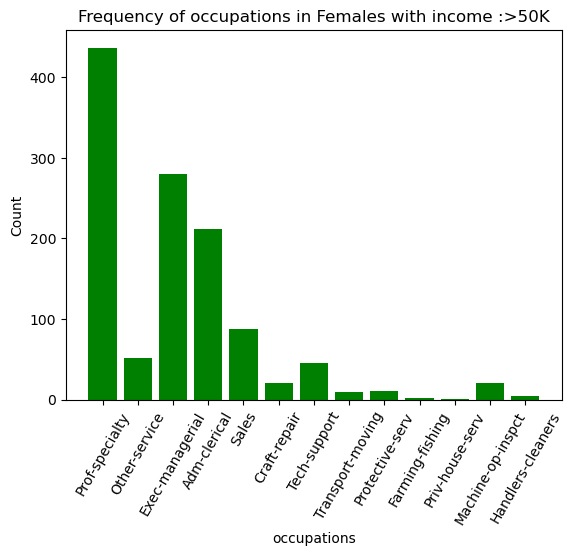

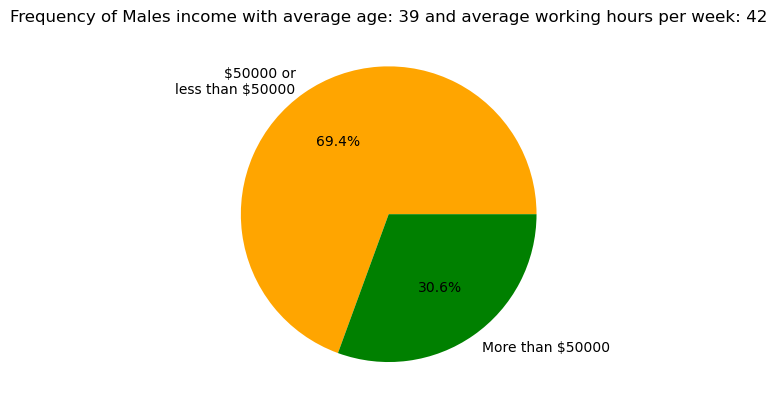

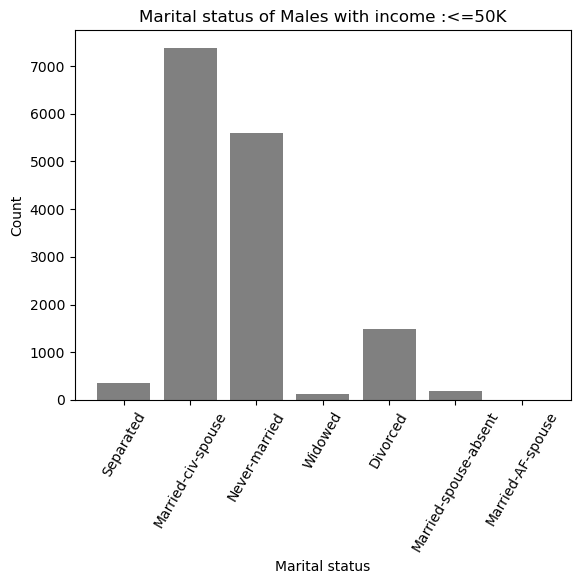

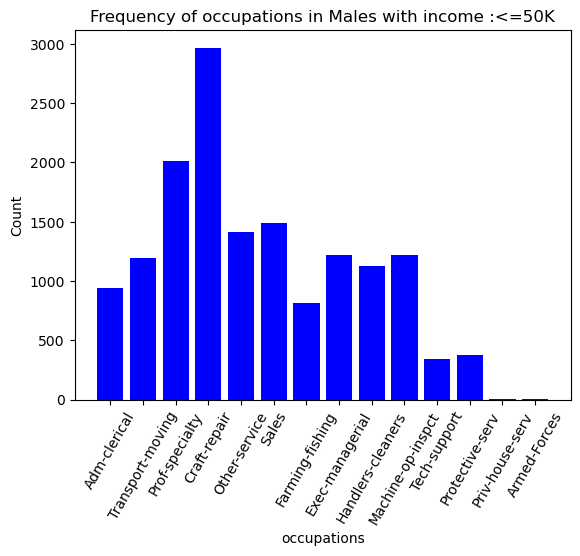

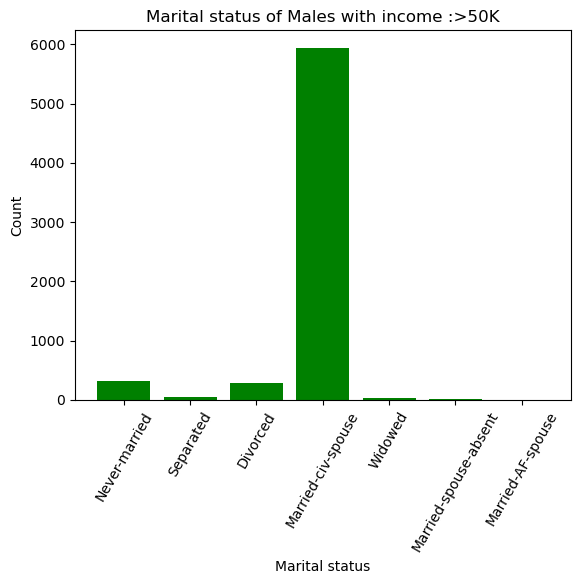

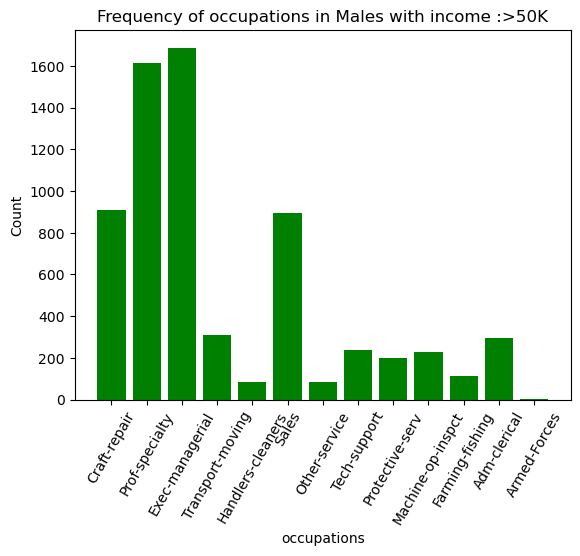

In [56]:
#Getting information from each gender
for gender in df.sex.unique():
    #Making a temporary data frame from each gender
    temp_df = df[df.sex==gender]

    #Visualizing on each gender's average age, average working hours per week and income
    pie(temp_df.income.value_counts().values,labels=['$50000 or\nless than $50000','More than $50000'],autopct='%1.1f%%',colors=sample(colors,2))
    title(f'Frequency of {gender}s income with average age: {int(temp_df.age.mean())} and average working hours per week: {int(temp_df["hours.per.week"].mean())}')
    show()

    #Analyzing each gender by its income 
    for salary in temp_df.income.unique():
        #Making a temporary dataframe from each type of income
        temp2_df = temp_df[temp_df.income==salary]

        #Visualizing on each type of income about marital status
        bar(temp2_df['marital.status'].unique(),
            [temp2_df['marital.status'].to_list().count(i) for i in temp2_df['marital.status'].unique()],
            color=sample(colors,1))
        title(f'Marital status of {gender}s with income :{salary}')
        xlabel('Marital status')
        ylabel('Count')
        xticks(rotation=60)
        show()

        #Visualizing on each type of income about occupations
        bar(temp2_df.occupation.unique(),
            [temp2_df.occupation.to_list().count(i) for i in temp2_df.occupation.unique()],
            color=sample(colors,1))
        title(f'Frequency of occupations in {gender}s with income :{salary}')
        xlabel('occupations')
        ylabel('Count')
        xticks(rotation=60)
        show()

In [57]:
#Getting some information from each country
result = list()
for salary in df.income.unique():
    #Making a temporary dataframe from each type of income
    temp_df = df[df.income==salary]
    
    for country in temp_df.native_country.unique():
        #Makinh a dataframe from each country of the temporary dataframe
        temp2_df = temp_df[temp_df.native_country==country]

        #Adding name of the country, Average age of the country and average working hours per week of the country to a list 
        result.append([country,
                       salary,
                       int(temp2_df.age.mean()),
                       int(temp2_df['hours.per.week'].mean())])

#Creating a dataframe from list
result = DataFrame(result,columns=['Region','Income','Average age','Aveage working hours per week'])

#Showcasing the results.
for country in result.Region.unique():
    print(f'Result for {country}')
    print(result[result.Region==country])
    print('\n','-'*50)

Result for United-States
           Region Income  Average age  Aveage working hours per week
0   United-States  <=50K           36                             38
41  United-States   >50K           44                             45

 --------------------------------------------------
Result for Mexico
    Region Income  Average age  Aveage working hours per week
1   Mexico  <=50K           32                             40
59  Mexico   >50K           40                             46

 --------------------------------------------------
Result for Greece
    Region Income  Average age  Aveage working hours per week
2   Greece  <=50K           44                             41
43  Greece   >50K           50                             50

 --------------------------------------------------
Result for Vietnam
     Region Income  Average age  Aveage working hours per week
3   Vietnam  <=50K           33                             37
67  Vietnam   >50K           35                         

#### End of part 1

# Part 2: Machine Learning

##### Task :Build a Machine Leraning model to predict the income column

#### Part 1 Phase 1: Data preprocessing

In [58]:
#Separating the target column
label = encoder.fit_transform(df.income)

#Separating the sex column and encoding it
sex = get_dummies(df.sex)

#Removing them from dataframe
df = df.drop(['income','sex'],axis=1)

In [59]:
#Making a dataframe from Non-Numeric columns
df_nan = df.drop([Col for Col in df.columns if df[Col].dtype!='O'],axis=1)

In [60]:
df_nan.sample(5)

,education,marital.status,relationship,race,native_country,occupation,workclass
11664,HS-grad,Married-civ-spouse,Husband,Black,United-States,Machine-op-inspct,Private
26741,HS-grad,Never-married,Other-relative,Black,United-States,Handlers-cleaners,Private
18257,Some-college,Married-civ-spouse,Wife,White,United-States,Adm-clerical,Private
14922,Bachelors,Never-married,Not-in-family,White,United-States,Prof-specialty,Private
8308,10th,Married-civ-spouse,Husband,White,United-States,Craft-repair,Self-emp-not-inc


In [61]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   education       32561 non-null  object
 1   marital.status  32561 non-null  object
 2   relationship    32561 non-null  object
 3   race            32561 non-null  object
 4   native_country  32561 non-null  object
 5   occupation      32561 non-null  object
 6   workclass       32561 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


In [62]:
#Making a datarame from numeric columns
df_num = df.drop([Col for Col in df.columns if df[Col].dtype=='O'],axis=1)

In [63]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   capital.gain    32561 non-null  int64
 4   capital.loss    32561 non-null  int64
 5   hours.per.week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [64]:
#Encoding Non-Numeric columns except 'sex' by LabelEncoder
Dict = dict()
for col in df_nan.columns:
    Dict[col]=encoder.fit_transform(df_nan[col])
Dict = DataFrame(Dict)

In [65]:
#Creating a dataframe from scaled numeric data and encoded Non-Numeric data
final = concat([Dict,sex,DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)],axis=1)
final.sample(5)

,education,marital.status,relationship,race,native_country,occupation,workclass,Female,Male,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
29490,15,2,0,1,38,3,5,False,True,0.470546,-0.481451,-0.031360,-0.14592,-0.216660,2.556243
31875,7,4,1,4,38,0,3,True,False,0.617171,-0.287919,0.746039,-0.14592,-0.216660,-0.035429
24673,15,4,3,2,38,7,3,True,False,-0.042642,2.366817,-0.031360,-0.14592,-0.216660,-0.035429
403,12,2,0,4,38,3,1,False,True,0.617171,0.902730,1.523438,-0.14592,4.689607,0.045560
16998,11,4,1,4,38,0,3,True,False,-1.288956,1.528263,-0.420060,-0.14592,-0.216660,-0.035429


In [66]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   education       32561 non-null  int32  
 1   marital.status  32561 non-null  int32  
 2   relationship    32561 non-null  int32  
 3   race            32561 non-null  int32  
 4   native_country  32561 non-null  int32  
 5   occupation      32561 non-null  int32  
 6   workclass       32561 non-null  int32  
 7   Female          32561 non-null  bool   
 8   Male            32561 non-null  bool   
 9   age             32561 non-null  float64
 10  fnlwgt          32561 non-null  float64
 11  education.num   32561 non-null  float64
 12  capital.gain    32561 non-null  float64
 13  capital.loss    32561 non-null  float64
 14  hours.per.week  32561 non-null  float64
dtypes: bool(2), float64(6), int32(7)
memory usage: 2.4 MB


In [67]:
#Splitting data to train and test sets
#80% of data is considered as train set
xtr , xts , ytr , yts = train_test_split(final,label,test_size=0.2,random_state=32)
print(f'Training size :{len(xtr)}\nTest size :{len(xts)}')

Training size :26048
Test size :6513


#### Part 2 Phase 2: Modeling and evaluating

In [68]:
#Collecting some famous classifiers in a list
models = [DecisionTreeClassifier,
          ExtraTreesClassifier ,
          RandomForestClassifier ,
          GradientBoostingClassifier,
          KNeighborsClassifier,
          XGBClassifier,
          CatBoostClassifier,
          LGBMClassifier]

res = list()
confusion_matrixs = list()
for algorithm in models:
    carrier = []

    #make an instance from each model and train it with train set
    model = algorithm()
    model.fit(xtr,ytr)

    #Saving scores on train set and test set in a temporary list 
    carrier.extend((str(algorithm).split('.')[-1][:-2],model.score(xtr,ytr)*100,model.score(xts,yts)*100))

    #Predicting test set
    pred = model.predict(xts)

    #Create a confusion matrix from predictions and real labels then save it in temporary list
    con = confusion_matrix(yts,pred)
    confusion_matrixs.append(con)

    #Train the model with total data and saving its accuracy
    model.fit(final,label)
    carrier.append(model.score(final,label)*100)

    #Save the temporary list in another list
    res.append(carrier)

#Making a dataframe from results of the loop that contains accuracy scores
res = DataFrame(res, columns=['Model','Accuracy on train set','Accuracy on test set','Accuracy on total data'])

Learning rate set to 0.041445
0:	learn: 0.6467040	total: 14.2ms	remaining: 14.2s
1:	learn: 0.6191365	total: 26.5ms	remaining: 13.2s
2:	learn: 0.5876397	total: 39.8ms	remaining: 13.2s
3:	learn: 0.5576028	total: 52.6ms	remaining: 13.1s
4:	learn: 0.5326789	total: 65.6ms	remaining: 13.1s
5:	learn: 0.5091972	total: 79.2ms	remaining: 13.1s
6:	learn: 0.4891083	total: 91.8ms	remaining: 13s
7:	learn: 0.4730735	total: 106ms	remaining: 13.1s
8:	learn: 0.4601466	total: 121ms	remaining: 13.3s
9:	learn: 0.4492359	total: 135ms	remaining: 13.3s
10:	learn: 0.4367930	total: 149ms	remaining: 13.4s
11:	learn: 0.4240371	total: 162ms	remaining: 13.4s
12:	learn: 0.4168422	total: 177ms	remaining: 13.4s
13:	learn: 0.4074021	total: 189ms	remaining: 13.3s
14:	learn: 0.3987539	total: 202ms	remaining: 13.3s
15:	learn: 0.3929671	total: 215ms	remaining: 13.2s
16:	learn: 0.3877865	total: 228ms	remaining: 13.2s
17:	learn: 0.3819089	total: 242ms	remaining: 13.2s
18:	learn: 0.3760203	total: 257ms	remaining: 13.2s
19:	le

In [69]:
res

,Model,Accuracy on train set,Accuracy on test set,Accuracy on total data
0,DecisionTreeClassifier,100.000000,81.744204,99.996929
1,ExtraTreesClassifier,100.000000,84.676800,99.996929
2,RandomForestClassifier,100.000000,85.551973,99.996929
3,GradientBoostingClassifier,86.628532,86.227545,86.714167
4,KNeighborsClassifier,87.833999,82.941809,87.825927
5,XGBClassifier,90.916769,87.133425,90.350419
6,CatBoostClassifier,90.083692,87.348380,89.941955
7,LGBMClassifier,88.966523,87.317672,88.602930


##### XGBClassifier had the best performance

Text(0.5, 1.0, 'XGBClassifier')

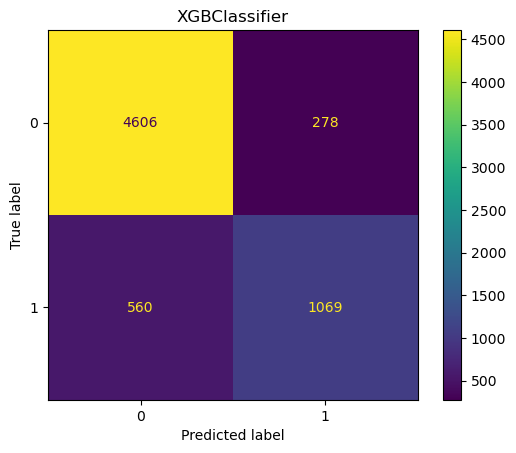

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrixs[5])
disp.plot()
title('XGBClassifier')

# End